# Assignment (Problem set #4)

## Q1. Linear SVM

유방암 분류 데이터셋을 이용해 Support Vector Machine을 이해해보자.scikit-learn에서 제공하는`load_breast_cancer`을 가져와 이용하면 된다.

이 데이터 세트에는 유방암 종양에 대한 정보가 포함되어 있으며 30가지 feature가 있다. 목표는 종양의 특징에 따라 **종양이 악성인지 양성인지** 예측하는 것임.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
dataset = None

X = dataset.data
y = dataset.target

#make dataframe by using pandas method
df = None
df['target'] = None

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
# df_x에는 target column을 제외한 데이터를, df_y에는 target column을 저장하도록 구성하시오.
# HINT : use iloc
df_x = None
df_y = None

# define model
# svm에서 제공하는 SVC를 가져와서 모델을 정의해라. 
#이때 kernel은 'linear'로, C는 0,5로 지정할 것.
from sklearn.svm import SVC
clf = SVC(_)

# SVM에서 핵심은 margin을 계산하는 것이기 때문에, scaling이 중요하다.
# 따라서 scaling을 진행한다.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_x)
#df_x_scaled = df_x.transform(df_x)

StandardScaler()

In [ ]:
# train_test_split 모듈을 활용해 데이터를 분할해보자.
# 이때 test와 train의 비율은 2:8, random_state 는 42로 지정하십시오.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = None

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# 성능 평가 
from sklearn.metrics import accuracy_score
print(_(_, _) , "%")  ##대입하세요

0.9649122807017544 %


## Q2. K-means clustering

`Mall_Customers`라는 데이터는(kaggle 제공) 성별, 연령, 연간 소득 및 지출 점수에 대한 고객 세부 정보를 제공한다. 이 데이터를 활용해서 K평균 군집 알고리즘을 배워보자.

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset from your drive & save it to variable 'data'
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/prometheus/basic_study_2023/wk4/Mall_Customers.csv', index_col='CustomerID')
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
data._ # feature별로 NaN값 갯수 확인, HINT : isnull() function

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [ ]:
data.columns

Index(['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [ ]:
# data에서 Annual_Income_(k$)	Spending_Score의 값들들만 이용하고자 한다.이에 맞게 X_data에 저장하시오.
# Hint : use iloc
X_data = None

In [ ]:
# Elbow Method를 활용해 최적의 cluster수를 찾아 이후 예측해보고자 한다.
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11): 
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # fit the model
    None
    # add the inertia_ into the list
    None

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

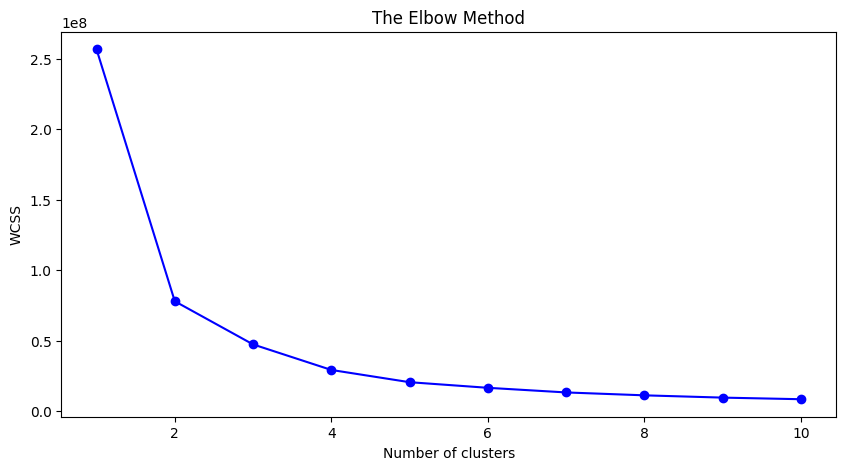

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

plt.plot(range(1, 11), inertia, marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# define and fit the model
# 위에서 plot한 그래프를 참고해서 cluster개수를 결정해보세요.
# 이때 KMeans 모델에서 n_clusters뿐만 아니라 init은 'k-means++'으로, random_stae는 42로 지정하십시오.

model = KMeans()
y_pred = model.fit_predict(X_data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


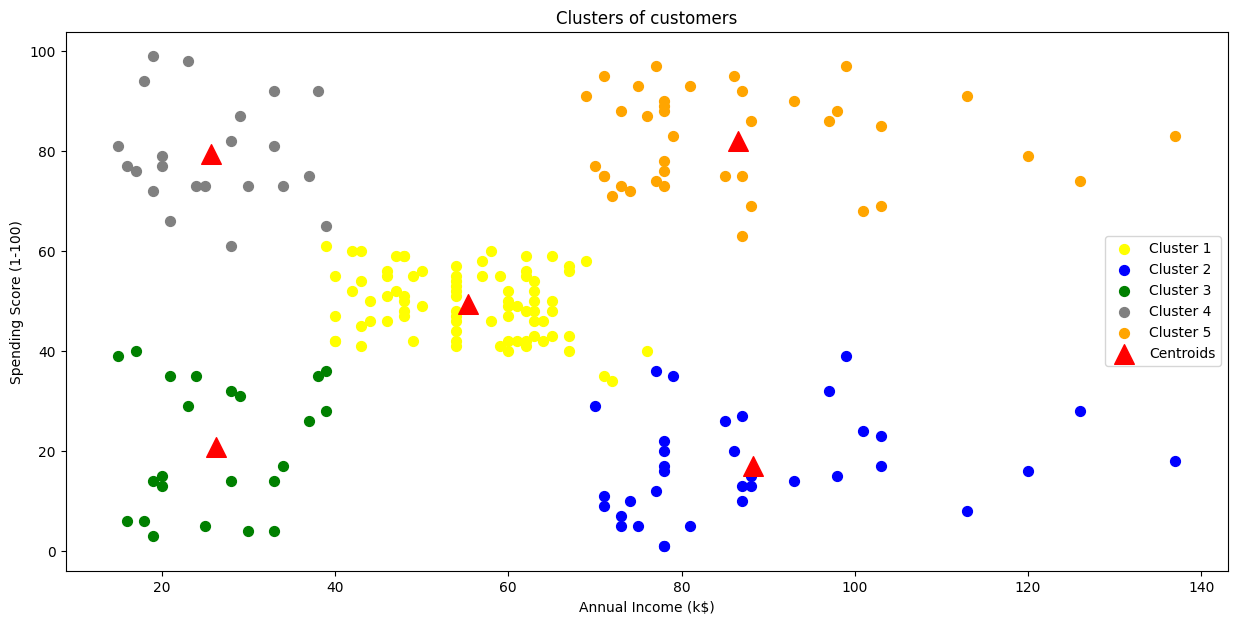

In [ ]:
# 클러스터 시각화
plt.figure(figsize=(15,7))

# X_data라는 데이터를 scatter plot으로 그려보세요.
# 색깔은 label의 종류별로 다르게 지정해볼 것.
plt.scatter(_, _, _, label = 'Cluster 1',s=50)
plt.scatter(_, _, _, label = 'Cluster 2',s=50)
plt.scatter(_, _, _, label = 'Cluster 3',s=50)
plt.scatter(_, _, _, label = 'Cluster 4',s=50)
plt.scatter(_, _, _, label = 'Cluster 5',s=50)

# cluster의 중심을 scatter plot으로 그려보세요. (marker는 ^로, 사이즈는 200으로 지정해보세요.)
# Hint : model.cluster_centers_ 에 대해서 찾아보세요.또한 색상은 빨강, label은 'Centroids', 
# size는 200, 마커는 삼각형이 되도록 지정해보십시오.
plt.scatter(_, _, _, _,_,_)

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


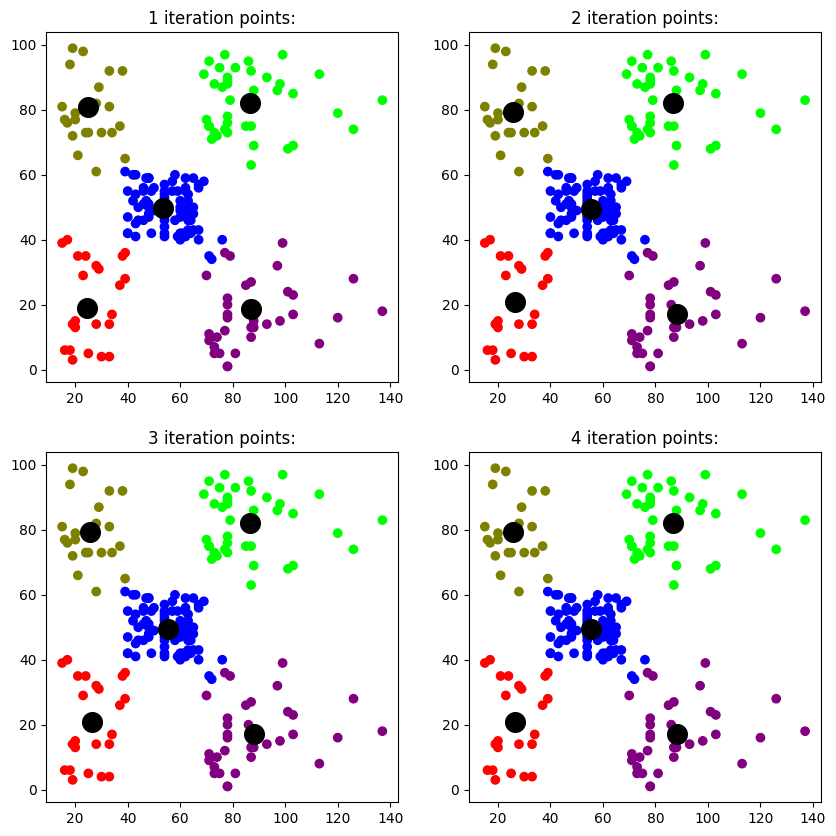

In [ ]:
# KMeans iteration이 1부터 4일때, 각각의 경우를 subplot에 그려보자
# 이 경우 데이터셋의 크기가 크지 않기 때문에 네번의 iteration에서 centroid의 변화가 크게 없음을 알려드립니다.
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=200, n_features=8, 
                           centers=5, cluster_std=1.8, random_state=101)

# HINT:행 두개, 열 두개
fig, ax = plt.subplots(_, _,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0

for i in range(None): ###
    ax[c,d].title.set_text(f"{i+1} iteration points:")
    Kmeans = KMeans(n_clusters=None, random_state=0, max_iter=i+1) ####
    Kmeans.fit(X_data)

    centroids=####
    
    ax[c,d].scatter(None, None, c= None, cmap='brg') ####
    ax[c,d].scatter(None, None, s=200, c='black') ####
    d+=1
    if d==2:
        c+=1
        d=0